In [265]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Latex, HTML, Math, display
from uncertainties import ufloat
from uncertainties.umath import sqrt
from uncertainties import unumpy as unp
from scipy.stats import linregress
from scipy.optimize import curve_fit
from uncertainties.umath import sin, radians 
from uncertainties.umath import *

# PW5 - Wellenoptik

## Beugung am Einzelspalt
 

### Versuchsaufbau und Durchführung

Ein Dioden-Laser mit nahezu parallelem und monochromatischem Licht wird senkrecht auf
einen Einzelspalt gerichtet. Das dahinter entstehende symmetrische Beugungsmuster wird
auf einem Schirm sichtbar gemacht und mithilfe eines karierten Blatts vermessen. Für
mehrere Ordnungen werden die Positionen der Minima relativ zum zentralen Maximum
bestimmt und mittels kleiner-Winkel-Näherung in Ablenkwinkel umgerechnet. Durch Auftragen von 
$n\lambda \ \text{gegen} \ \alpha_{n}$ und einer linearen Regression ergibt sich die Spaltbreite \( b \) als Steigung der Geraden.



### Wichtige Formeln und Zusammenhänge

Bedingung für Minima
$$
b \sin(\alpha_{\min,n}) = n\lambda
$$


Lineare Auswertung
$$
n\lambda = b \alpha_n
$$




#### Verwendete Geräte und Unsicherheiten

* Lineal: 1mm

,n,α(n)
0,1,0.00047+/-0.00005
1,2,0.00084+/-0.00005
2,3,0.00132+/-0.00005
3,4,0.00174+/-0.00005
4,5,0.00216+/-0.00005
5,6,0.00258+/-0.00005


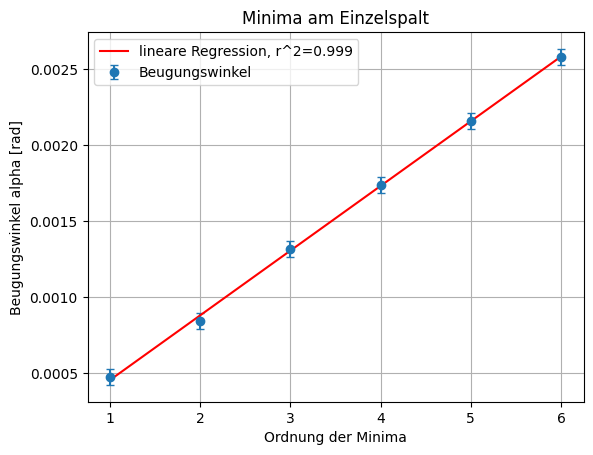

<IPython.core.display.Latex object>

In [266]:
#Einzelspalt

_lambda = 635 * 10**(-6) #Wellenlänge Licht [nm]
n = np.array([1, 2, 3, 4, 5, 6])   #Ordnung der Minima
unsicherheit = 1    #ableseunsicherheit lineal / Millimeterpapier [mm]
a = ufloat(11900-2400, unsicherheit)  #entfernung laser [mm] - schirm ##noch ändern!!!
d = unp.uarray([9, 16, 25, 33, 41, 49], unsicherheit)    #abstand zwischen 2 minima n-ter ordnung [mm]
alpha_n = ((d/2)/a)   # winkel berechnen
alpha_nom = np.array(unp.nominal_values(alpha_n))


# #lineare regression
# def func(k,x,z):
#     return k*x + z

#popt, pcov = curve_fit(func, n, alpha_n)

#lineare regressione
slope, intercept, r, _, std = linregress(n, alpha_nom)
r_2 = r**2


steigung = ufloat(slope, std) #evtl mit scidavis nachprüfen?
b = (_lambda / steigung) #[mm]

#ub = (unp.nominal_values(b),unp.std_devs(b)) #falls wir unsicherheit anpassen wollen

alpha_n_vals = unp.nominal_values(alpha_n)
alpha_n_errs = unp.std_devs(alpha_n)


#tabelle
tabelle = {
    "n": n,
    "α(n)": alpha_n 
}

#pandas dataframe
df = pd.DataFrame(tabelle)

#tabelle anzeigen
display(df)


#Plot
plt.figure()
plt.errorbar(n, alpha_n_vals, yerr=alpha_n_errs, fmt='o', capsize=3, label="Beugungswinkel") 
plt.plot(n, n*slope+intercept, color="red", markersize=2, label=rf"lineare Regression, r^2={r_2:.3f}") # regressionsfunktion
plt.xlabel("Ordnung der Minima")
plt.ylabel("Beugungswinkel alpha [rad]")
plt.title("Minima am Einzelspalt")
plt.legend()
plt.grid(True)
plt.show()

display(Latex((rf"$$b = {b:.3f} [mm]$$")))



### Diskussion

## Beugung am Doppelspalt

### Versuchsaufbau und Durchführung

Der Doppelspalt wird in den Strahlengang des Dioden-Lasers eingesetzt und der entstehende
Beugungsstreifen auf einem Schirm sichtbar gemacht. Durch leichtes Drehen des Lasers wird eine
symmetrische Ausleuchtung beider Spalte eingestellt, sodass die Interferenzmaxima klar zu erkennen
sind. Anschließend werden die Positionen der Minima der Einhüllenden wie beim Einzelspalt vermessen,
um die Spaltbreite b zu bestimmen. Danach wird die Anzahl der innerhalb des zentralen Maximums
sichtbaren Interferenzmaxima bestimmt, woraus zusammen mit der Lage des ersten Einzelspaltminimums
der Spaltabstand g berechnet werden kann.

### Wichtige Formeln – Doppelspalt

Interferenz-Maxima 
$$
g \sin(\alpha_{\max,k}) = k\lambda
$$

Einzelspalt-Einhüllende 
$$
b \sin(\alpha_{\min,n}) = n\lambda
$$


Spaltenabstand
Für das zentrale Maximum mit k
$$
g = k \cdot b
$$





#### Verwendete Geräte und unsicherheiten

* Lineal: 1 mm

,n,α(n)
0,1,0.00063+/-0.00007
1,2,0.00140+/-0.00007
2,3,0.00204+/-0.00007
3,4,0.00274+/-0.00007
4,5,0.00344+/-0.00007
5,6,0.00421+/-0.00007


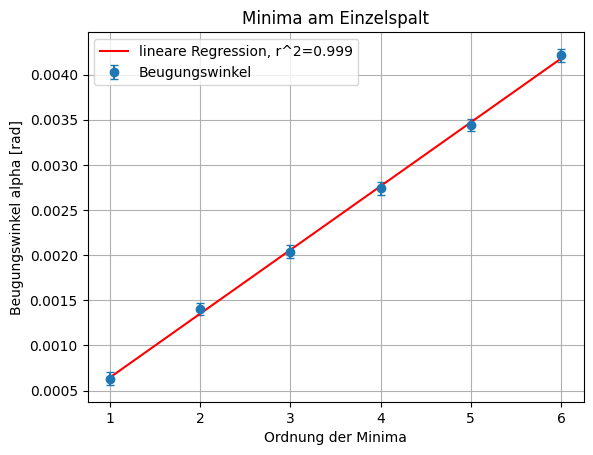

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [267]:
# Doppelspalt

#spaltbreite b - analog einzelspalt
_lambda = 635 * 10**(-6) #Wellenlänge Licht [mm]
n = np.array([1, 2, 3, 4, 5, 6])    #Ordnung der Minima
unsicherheit = 1    #ableseunsicherheit lineal / Millimeterpapier [mm]
a = ufloat(9520-2400, unsicherheit)  #entfernung laser [mm] - schirm ##noch ändern!!!
d = unp.uarray([9, 20, 29, 39, 49, 60], unsicherheit)    #abstand zwischen 2 minima n-ter ordnung
alpha_n = unp.arctan((d/2)/a)   # winkel berechnen
alpha_nom = np.array(unp.nominal_values(alpha_n))

# #lineare regression
# def func(k,x,z):
#     return k*x + z

#popt, pcov = curve_fit(func, n, alpha_n)

#lineare regressione
slope, intercept, r, _, std = linregress(n, alpha_nom)
r_2 = r**2

steigung = ufloat(slope, std) #evtl mit scidavis nachprüfen?
b = (_lambda / steigung) #[mm]

#Spaltabstand g
k = ufloat(5,1) #wie viele maxima II in erstem Minimum I? (integer, unsicherheit mind. 1) ##noch ändern!!
n_1 = 1

g = b * k  # evtl mal 0.5?

alpha_n_vals = unp.nominal_values(alpha_n)
alpha_n_errs = unp.std_devs(alpha_n)


#tabelle
tabelle = {
    "n": n,
    "α(n)": alpha_n 
}

#pandas dataframe
df = pd.DataFrame(tabelle)

#tabelle anzeigen
display(df)


#Plot (minima einzelspalt)
plt.figure()
plt.errorbar(n, alpha_n_vals, yerr=alpha_n_errs, fmt='o', capsize=3, label="Beugungswinkel") 
plt.plot(n, n*slope+intercept, color="red", markersize=2, label=rf"lineare Regression, r^2={r_2:.3f}") # regressionsfunktion
plt.xlabel("Ordnung der Minima")
plt.ylabel("Beugungswinkel alpha [rad]")
plt.title("Minima am Einzelspalt")
plt.legend()
plt.grid(True)
plt.show()

display(Latex((rf"$$b = {b:.2f} \mathrm [mm]$$")))
display(Latex((rf"$$g = {g:.2f} \mathrm [mm]$$")))


### Diskussion

## Wellenlängenmessung mit dem Gitter

### Versuchsaufbau und Durchführung

Die Gitterkonstante \( g \) wird der Herstellerangabe entnommen. Das Licht einer
Spektrallampe wird durch den Kollimatorspalt geführt, sodass ein paralleles Strahlenbündel
auf das Beugungsgitter trifft. Die Ablenkwinkel der Spektrallinien werden mit dem
Fernrohr des Goniometers links und rechts des Zentralmaximums bestimmt. Aus der Hälfte
der Differenz beider Winkel ergibt sich der Beugungswinkel $( \alpha_k )$. Mithilfe der
Gittergleichung wird daraus für jede Ordnung \( k \) die Wellenlänge berechnet.



### Wichtige Formeln und Zusammenhänge
$$
g \sin(\alpha_k) = k\lambda
$$

#### Verwendete Geräte und Unsicherheiten

* Spektrmeter: 30 Winkelminuten

In [268]:
# #Beugungsgitter

# # Beugungsbild vermessen
# _lambda = 635  #Wellenlänge Licht [nm]
# unsicherheit = 1    #ableseunsicherheit lineal / Millimeterpapier [mm]
# a = ufloat(2, unsicherheit)  #entfernung laser [mm] - schirm ##noch ändern!!!
# d = ufloat(5, unsicherheit)    #abstand zwischen maxima 1-ter ordnung [mm] ##noch ändern!!
# alpha_n = unp.arctan((d/2)/a)   # winkel berechnen

# g = _lambda/alpha_n

# display(Latex((rf"§§g = {g:.2f} [mm]")))


In [ ]:
#Spektrometer - Wellenlängen von Spektrallinien bestimmen
g = 1/140 #ablesen vom Gitter ##noch ändern!! 1/140 mm?
au = np.radians(30/60)

#blau
k_1 = [1,2,3] #maxima k-ter Ordnung

au = 30/60 #ableseunsicherheit #30 Winkelminuten = 0.5°
beta_1 = unp.uarray([((170*60)+11)/60, ((166*60)+49)/60, ((163*60)+22)/60], au)
beta_2 = unp.uarray([((177*60)+4)/60, ((180*60)+40)/60, ((184*60)+50)/60], au)
alpha_1 = np.radians(unp.nominal_values((beta_2 - beta_1)/2))

lambda_1 = ((g * alpha_1)/k_1) * 10**6  #mm
lambda_1_mean = np.mean(unp.nominal_values(lambda_1))
lambda_1_std = (np.std(unp.nominal_values(lambda_1)))/unp.sqrt(3)
print(ufloat(lambda_1_mean, lambda_1_std))
farbe_1 = "blau" #Farbeindruck


#Spektrallinie 2 grün
k_2 = [1,2,3] #maxima k-ter Ordnung

au = 30/60 #ableseunsicherheit #30 Winkelminuten = 0.5°
gamma_1 = unp.uarray([((169*60)+25)/60, ((165*60)+4)/60, ((160*60)+45)/60], au)
gamma_2 = unp.uarray([((178*60)+1)/60, ((182*60)+24)/60, ((186*60)+50)/60], au)
alpha_2 = np.radians(unp.nominal_values((gamma_2 - gamma_1)/2))

lambda_2 = ((g * alpha_2)/k_2) * 10**6
lambda_2_mean = np.mean(unp.nominal_values(lambda_2))
lambda_2_std = (np.std(unp.nominal_values(lambda_2)))/unp.sqrt(3)
print(ufloat(lambda_2_mean, lambda_2_std))
farbe_2 = "grün" #Farbeindruck



#Spektrallinie 3 gelb
k_3 = [1,2,3] #maxima k-ter Ordnung

au = 30/60 #ableseunsicherheit #30 Winkelminuten = 0.5°
delta_1 = unp.uarray([((169*60)+5)/60, ((164*60)+32)/60, ((160*60)+0)/60], au)
delta_2 = unp.uarray([((178*60)+22)/60, ((182*60)+52)/60, ((187*60)+42)/60], au)
alpha_3 = np.radians(unp.nominal_values((delta_2 - delta_1)/2))

lambda_3 = ((g * alpha_3)/k_3) * 10**6
lambda_3_mean = np.mean(unp.nominal_values(lambda_3))
lambda_3_std = (np.std(unp.nominal_values(lambda_3)))/unp.sqrt(3)
print(ufloat(lambda_3_mean, lambda_3_std))
farbe_3 = "gelb" #Farbeindruck


werte = unp.uarray([lambda_1_mean, lambda_2_mean, lambda_3_mean], [lambda_1_std, lambda_2_std, lambda_3_std])



#Literaturwerte
natrium_data = {
    "λ [nm]": [616.08, 615.42, 589.59, 589.00, 568.82, 568.27],
    "Farbeindruck": ["gelbrot", "gelbrot", "gelb", "gelb", "gelbgrün", "gelbgrün"],
    "Helligkeit": ["mittel", "mittel", "stark", "mittel", "mittel","mittel"]
}
df_natrium = pd.DataFrame(natrium_data)

kalium_data = {
    "λ [nm]": [769.90, 766.40, 404.72, 404.41],
    "Farbeindruck": ["dunkelrot", "dunkelrot", "violett", "violett"],
    "Helligkeit": ["stark", "stark", "mittel","mittel"]
}
df_kalium = pd.DataFrame(kalium_data)

cadmium_data = {
    "λ [nm]": [643.85, 635.99, 508.58, 479.99, 467.82, 441.46],
    "Farbeindruck": ["rot", "gelbrot", "grün", "blaugrün", "blau", "blau"],
    "Helligkeit": ["stark", "schwach", "stark", "stark", "stark", "mittel"]
}
df_cadmium = pd.DataFrame(cadmium_data)

quecksilber_data = {
    "λ [nm]": [435.84, 546.07, 576.96],
    "Farbe": ["blau", "grün", "gelb-orange"]
}
df_quecksilber = pd.DataFrame(quecksilber_data)

df_literatur = df_quecksilber #welches ist es? ##noch einfügen!!

literaturwerte = df_literatur["λ [nm]"] # evtl nicht benötigte einträge aus den tabellen löschen damits schön dargestellt wird
differenz = literaturwerte - werte

vergleich_tabelle = pd.DataFrame({
     "Farbe": df_literatur["Farbe"],
     "λ  [nm]": literaturwerte, #ändern welches es ist !!
     "λ gemessen [nm]": werte,
     "Abweichung [nm]": differenz
})

display(vergleich_tabelle)


436+/-4
539.4+/-1.4
575.2+/-1.7


,Farbe,λ [nm],λ gemessen [nm],Abweichung [nm]
0,blau,435.84,436+/-4,0+/-4
1,grün,546.07,539.4+/-1.4,6.7+/-1.4
2,gelb-orange,576.96,575.2+/-1.7,1.8+/-1.7


### Diskussion

Aus unseren Werten ist erkennbar, dass es sich um 